In [1]:
import polars as pl
import pytz
import yfinance as yf
from datetime import datetime, date
import re

In [2]:
df_tqqq = pl.from_pandas( yf.ticker.Ticker("TQQQ").history(interval="30m", start="2025-02-26", end="2025-03-26").reset_index(names="ts_event") )
# df_tqqq = df_tqqq.with_columns(
#     (pl.col("ts_event") - pl.duration(minutes=30)).cast(pl.Datetime("ns", time_zone="America/New_York"))
# )
names_mapping = {
    # "Open": "und_open",
    # "High": "und_high",
    # "Low": "und_low",
    # "Close": "und_close",
    # "Volume": "und_volume",
    "ts_event": "ts_event_date"
}
df_tqqq = df_tqqq.rename( names_mapping )
df_tqqq

ts_event_date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
"datetime[ns, America/New_York]",f64,f64,f64,f64,i64,f64,f64,f64
2025-02-26 09:30:00 EST,78.57,79.402,78.047997,79.269997,11505626,0.0,0.0,0.0
2025-02-26 10:00:00 EST,79.279999,80.050003,78.879997,79.065002,6135649,0.0,0.0,0.0
2025-02-26 10:30:00 EST,79.059998,79.870003,79.059998,79.82,3733923,0.0,0.0,0.0
2025-02-26 11:00:00 EST,79.839996,80.400002,79.830101,79.974998,4207473,0.0,0.0,0.0
2025-02-26 11:30:00 EST,79.970001,80.449898,79.690002,79.780701,3324587,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…
2025-03-25 13:30:00 EDT,66.540001,66.739998,66.530197,66.584999,2102807,0.0,0.0,0.0
2025-03-25 14:00:00 EDT,66.580002,66.995003,66.4701,66.775002,2606132,0.0,0.0,0.0
2025-03-25 14:30:00 EDT,66.785004,66.830002,66.565002,66.7099,2126657,0.0,0.0,0.0


In [3]:
options_hourly_data_file = r"C:\Users\User\Desktop\projects\trading\data\OPRA-20250329-XW7CFKR3PW\opra-pillar-20250226-20250325.ohlcv-1h.csv"

In [4]:
from scipy.optimize import brentq
from scipy.stats import norm
import numpy as np

def black_scholes_price(S, K, T, r, sigma, option_type='C'):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'C':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def implied_volatility(S, K, T, r, market_price, option_type='C'):
    if not all( ( S,K,T,r,market_price,option_type ) ):
        print( ( S,K,T,r,market_price,option_type ) )
    try:
        return brentq(
            lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - market_price,
            1e-6, 5.0, maxiter=500)
    except ValueError:
        return np.nan


In [5]:
df_options = pl.read_csv(options_hourly_data_file) \
    .with_columns(
        pl.col("symbol").str.split("  ")
    ) \
    .with_columns(
        pl.col("ts_event").str.strptime( pl.Datetime("ns", time_zone=pytz.timezone("America/New_York")) ).alias("ts_event_date"),
        pl.col("symbol").list.get(0).alias("underlying"),
        pl.col("symbol").list.get(-1).str.slice(0, 6).str.strptime(pl.Date, "%y%m%d").cast(pl.Datetime("ns")).dt.replace_time_zone("America/New_York").alias("expiry"),
        pl.col("symbol").list.get(-1).str.slice(6, 1).alias("call_put"),
        (pl.col("symbol").list.get(-1).str.slice(7).cast(pl.Int64) / 1000.0).alias("strike")
    ) \
    .with_columns(
        (pl.col("expiry") - pl.col("ts_event_date")).dt.total_days().alias("days_to_expiry"),
    ) 
    
df_options

ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,ts_event_date,underlying,expiry,call_put,strike,days_to_expiry
str,i64,i64,i64,f64,f64,f64,f64,i64,list[str],"datetime[ns, America/New_York]",str,"datetime[ns, America/New_York]",str,f64,i64
"""2025-02-26T14:00:00.000000000Z""",34,32,1426078889,5.4,5.4,5.4,5.4,4,"[""TQQQ"", ""250321P00080000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-03-21 00:00:00 EDT,"""P""",80.0,22
"""2025-02-26T14:00:00.000000000Z""",34,29,1426078889,5.4,5.4,5.4,5.4,7,"[""TQQQ"", ""250321P00080000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-03-21 00:00:00 EDT,"""P""",80.0,22
"""2025-02-26T14:00:00.000000000Z""",34,35,1442848551,4.0,4.0,4.0,4.0,1,"[""TQQQ"", ""250228P00081000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-02-28 00:00:00 EST,"""P""",81.0,1
"""2025-02-26T14:00:00.000000000Z""",34,32,1442865848,2.58,2.58,2.14,2.37,37,"[""TQQQ"", ""250228P00079000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-02-28 00:00:00 EST,"""P""",79.0,1
"""2025-02-26T14:00:00.000000000Z""",34,33,1442865848,2.37,2.37,2.37,2.37,1,"[""TQQQ"", ""250228P00079000""]",2025-02-26 09:00:00 EST,"""TQQQ""",2025-02-28 00:00:00 EST,"""P""",79.0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-03-25T19:00:00.000000000Z""",34,22,1426067686,3.97,3.97,3.97,3.97,5,"[""TQQQ"", ""250425P00066000""]",2025-03-25 15:00:00 EDT,"""TQQQ""",2025-04-25 00:00:00 EDT,"""P""",66.0,30
"""2025-03-25T19:00:00.000000000Z""",34,28,1426067686,3.95,3.95,3.95,3.95,4,"[""TQQQ"", ""250425P00066000""]",2025-03-25 15:00:00 EDT,"""TQQQ""",2025-04-25 00:00:00 EDT,"""P""",66.0,30
"""2025-03-25T19:00:00.000000000Z""",34,36,1426067686,3.9,3.9,3.9,3.9,4,"[""TQQQ"", ""250425P00066000""]",2025-03-25 15:00:00 EDT,"""TQQQ""",2025-04-25 00:00:00 EDT,"""P""",66.0,30


In [6]:
other_columns = set(df_options.columns) - {"ts_event", "instrument_id", "publisher_id", "rtype", "open", "high", "low", "close", "volume"}
other_columns

{'call_put',
 'days_to_expiry',
 'expiry',
 'strike',
 'symbol',
 'ts_event_date',
 'underlying'}

In [7]:
df_options = df_options \
    .group_by(["ts_event", "instrument_id"]) \
    .agg([
        pl.col("open").mean(),
        pl.col("high").mean(),
        pl.col("low").mean(),
        pl.col("close").mean(),
        pl.col("volume").sum(),
        *[ pl.col(col).last() for col in other_columns]
    ])
    
df_options

ts_event,instrument_id,open,high,low,close,volume,symbol,days_to_expiry,strike,underlying,call_put,expiry,ts_event_date
str,i64,f64,f64,f64,f64,i64,list[str],i64,f64,str,str,"datetime[ns, America/New_York]","datetime[ns, America/New_York]"
"""2025-02-26T18:00:00.000000000Z""",1442872403,4.466667,4.466667,4.45,4.45,356,"[""TQQQ"", ""250404C00080500""]",36,80.5,"""TQQQ""","""C""",2025-04-04 00:00:00 EDT,2025-02-26 13:00:00 EST
"""2025-03-25T15:00:00.000000000Z""",1426080771,0.303333,0.303333,0.303333,0.303333,4,"[""TQQQ"", ""250411P00051000""]",16,51.0,"""TQQQ""","""P""",2025-04-11 00:00:00 EDT,2025-03-25 11:00:00 EDT
"""2025-03-06T19:00:00.000000000Z""",1442860904,2.96,2.96,2.945,2.945,23,"[""TQQQ"", ""250404C00072500""]",28,72.5,"""TQQQ""","""C""",2025-04-04 00:00:00 EDT,2025-03-06 14:00:00 EST
"""2025-02-26T16:00:00.000000000Z""",1426096689,0.81,0.81,0.81,0.81,1,"[""TQQQ"", ""250417C00099000""]",49,99.0,"""TQQQ""","""C""",2025-04-17 00:00:00 EDT,2025-02-26 11:00:00 EST
"""2025-03-06T15:00:00.000000000Z""",1442871670,4.58,4.58,4.58,4.58,4,"[""TQQQ"", ""250404C00072000""]",28,72.0,"""TQQQ""","""C""",2025-04-04 00:00:00 EDT,2025-03-06 10:00:00 EST
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-03-10T16:00:00.000000000Z""",1442870315,19.26,19.266667,19.26,19.266667,27,"[""TQQQ"", ""250314P00080000""]",3,80.0,"""TQQQ""","""P""",2025-03-14 00:00:00 EDT,2025-03-10 12:00:00 EDT
"""2025-03-24T13:00:00.000000000Z""",1426071597,5.467,5.467,5.422,5.425,122,"[""TQQQ"", ""250417P00068000""]",23,68.0,"""TQQQ""","""P""",2025-04-17 00:00:00 EDT,2025-03-24 09:00:00 EDT
"""2025-02-28T18:00:00.000000000Z""",1426063850,1.79,1.79,1.79,1.79,2,"[""TQQQ"", ""250321P00061000""]",20,61.0,"""TQQQ""","""P""",2025-03-21 00:00:00 EDT,2025-02-28 13:00:00 EST


In [8]:
df_options.filter( (pl.col("ts_event") == "2025-02-26T20:00:00.000000000Z") )

ts_event,instrument_id,open,high,low,close,volume,symbol,days_to_expiry,strike,underlying,call_put,expiry,ts_event_date
str,i64,f64,f64,f64,f64,i64,list[str],i64,f64,str,str,"datetime[ns, America/New_York]","datetime[ns, America/New_York]"
"""2025-02-26T20:00:00.000000000Z""",1426071414,1.081667,1.081667,1.081667,1.081667,33,"[""TQQQ"", ""250321P00063000""]",22,63.0,"""TQQQ""","""P""",2025-03-21 00:00:00 EDT,2025-02-26 15:00:00 EST
"""2025-02-26T20:00:00.000000000Z""",1426103778,1.313077,1.376923,1.311538,1.375385,180,"[""TQQQ"", ""250307C00083000""]",8,83.0,"""TQQQ""","""C""",2025-03-07 00:00:00 EST,2025-02-26 15:00:00 EST
"""2025-02-26T20:00:00.000000000Z""",1442848879,3.75,3.75,3.75,3.75,3,"[""TQQQ"", ""250314C00079500""]",15,79.5,"""TQQQ""","""C""",2025-03-14 00:00:00 EDT,2025-02-26 15:00:00 EST
"""2025-02-26T20:00:00.000000000Z""",1442860931,6.55,6.55,6.55,6.55,4,"[""TQQQ"", ""250404C00077000""]",36,77.0,"""TQQQ""","""C""",2025-04-04 00:00:00 EDT,2025-02-26 15:00:00 EST
"""2025-02-26T20:00:00.000000000Z""",1426065892,13.48,13.48,13.48,13.48,18,"[""TQQQ"", ""250919C00078000""]",204,78.0,"""TQQQ""","""C""",2025-09-19 00:00:00 EDT,2025-02-26 15:00:00 EST
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-02-26T20:00:00.000000000Z""",1442849181,4.5,4.5,4.5,4.5,1,"[""TQQQ"", ""250328P00075000""]",29,75.0,"""TQQQ""","""P""",2025-03-28 00:00:00 EDT,2025-02-26 15:00:00 EST
"""2025-02-26T20:00:00.000000000Z""",1426073726,0.27,0.27,0.27,0.27,1,"[""TQQQ"", ""250307C00089000""]",8,89.0,"""TQQQ""","""C""",2025-03-07 00:00:00 EST,2025-02-26 15:00:00 EST
"""2025-02-26T20:00:00.000000000Z""",1426103621,3.9,3.9,3.9,3.9,45,"[""TQQQ"", ""250919P00050000""]",204,50.0,"""TQQQ""","""P""",2025-09-19 00:00:00 EDT,2025-02-26 15:00:00 EST


In [9]:
df_options.filter( pl.col("days_to_expiry") == 0 )

ts_event,instrument_id,open,high,low,close,volume,symbol,days_to_expiry,strike,underlying,call_put,expiry,ts_event_date
str,i64,f64,f64,f64,f64,i64,list[str],i64,f64,str,str,"datetime[ns, America/New_York]","datetime[ns, America/New_York]"
"""2025-02-27T18:00:00.000000000Z""",1442854494,0.045,0.055,0.045,0.055,16,"[""TQQQ"", ""250228P00069000""]",0,69.0,"""TQQQ""","""P""",2025-02-28 00:00:00 EST,2025-02-27 13:00:00 EST
"""2025-03-14T17:00:00.000000000Z""",1442867676,0.01,0.01,0.01,0.01,24,"[""TQQQ"", ""250314C00066000""]",0,66.0,"""TQQQ""","""C""",2025-03-14 00:00:00 EDT,2025-03-14 13:00:00 EDT
"""2025-02-28T18:00:00.000000000Z""",1442854439,13.5,13.5,13.5,13.5,3,"[""TQQQ"", ""250228P00085000""]",0,85.0,"""TQQQ""","""P""",2025-02-28 00:00:00 EST,2025-02-28 13:00:00 EST
"""2025-03-20T13:00:00.000000000Z""",1426096963,12.25,12.25,12.25,12.25,5,"[""TQQQ"", ""250321P00074000""]",0,74.0,"""TQQQ""","""P""",2025-03-21 00:00:00 EDT,2025-03-20 09:00:00 EDT
"""2025-03-21T14:00:00.000000000Z""",1426081052,6.034444,6.034444,5.783333,5.811111,33,"[""TQQQ"", ""250321P00066000""]",0,66.0,"""TQQQ""","""P""",2025-03-21 00:00:00 EDT,2025-03-21 10:00:00 EDT
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-02-27T17:00:00.000000000Z""",1442871767,0.036667,0.036667,0.033333,0.033333,117,"[""TQQQ"", ""250228C00083500""]",0,83.5,"""TQQQ""","""C""",2025-02-28 00:00:00 EST,2025-02-27 12:00:00 EST
"""2025-03-21T13:00:00.000000000Z""",1426089608,0.01125,0.01125,0.01,0.01,416,"[""TQQQ"", ""250321C00068000""]",0,68.0,"""TQQQ""","""C""",2025-03-21 00:00:00 EDT,2025-03-21 09:00:00 EDT
"""2025-03-13T13:00:00.000000000Z""",1442860081,25.78,25.78,25.78,25.78,3,"[""TQQQ"", ""250314P00085000""]",0,85.0,"""TQQQ""","""P""",2025-03-14 00:00:00 EDT,2025-03-13 09:00:00 EDT


In [10]:
# .filter( ( pl.col("ts_event_date") < pl.lit("2025-02-27").str.strptime(pl.Datetime("ns", time_zone="America/New_York") ) ) ) \
    
df_sample = df_options \
    .join( df_tqqq, on="ts_event_date", how="left") \
    .filter( (pl.col("days_to_expiry") >= 0) ) \
    .drop_nulls() \
    .filter( ( pl.col("ts_event") == "2025-02-27T20:00:00.000000000Z" )  ) \
    .with_columns(
        pl.struct(["Close", "strike", "days_to_expiry", "close", "call_put"]).map_elements(
            lambda row: implied_volatility(
                S=row["Close"],
                K=row["strike"],
                T=row["days_to_expiry"] / 365,
                r=0.05,
                market_price=row["close"],
                option_type=row["call_put"]
            ),
            return_dtype=pl.Float32
        ).alias("implied_vol")
    ) \
    .filter( pl.col("implied_vol").is_not_nan() ) \
    .sort( pl.col("instrument_id") )
    
df_sample

(72.52999877929688, 61.0, 0.0, 0.05, 0.02, 'P')(72.52999877929688, 87.5, 0.0, 0.05, 14.48, 'P')

(72.52999877929688, 71.0, 0.0, 0.05, 2.2011111111111106, 'C')
(72.52999877929688, 82.5, 0.0, 0.05, 9.93, 'P')
(72.52999877929688, 64.0, 0.0, 0.05, 0.05600000000000001, 'P')
(72.52999877929688, 87.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 82.0, 0.0, 0.05, 9.1725, 'P')
(72.52999877929688, 80.5, 0.0, 0.05, 7.734999999999999, 'P')
(72.52999877929688, 73.0, 0.0, 0.05, 2.072222222222222, 'P')
(72.52999877929688, 87.5, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 94.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 75.0, 0.0, 0.05, 3.237777777777777, 'P')
(72.52999877929688, 90.0, 0.0, 0.05, 17.15857142857143, 'P')
(72.52999877929688, 81.0, 0.0, 0.05, 0.025000000000000005, 'C')
(72.52999877929688, 94.0, 0.0, 0.05, 21.75, 'P')
(72.52999877929688, 50.0, 0.0, 0.05, 0.012, 'P')
(72.52999877929688, 73.0, 0.0, 0.05, 0.9722222222222222, 'C')
(72.52999877929688, 86.0, 0.0, 0.05, 0.011666666666666667, 'C')
(72.

C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))


(72.52999877929688, 73.5, 0.0, 0.05, 1.9727777777777777, 'P')
(72.52999877929688, 86.0, 0.0, 0.05, 13.275714285714285, 'P')
(72.52999877929688, 76.5, 0.0, 0.05, 4.313846153846154, 'P')
(72.52999877929688, 80.0, 0.0, 0.05, 7.5, 'P')
(72.52999877929688, 88.5, 0.0, 0.05, 16.4, 'P')
(72.52999877929688, 77.0, 0.0, 0.05, 4.773529411764706, 'P')
(72.52999877929688, 72.5, 0.0, 0.05, 1.5905555555555553, 'P')
(72.52999877929688, 66.0, 0.0, 0.05, 0.13363636363636366, 'P')
(72.52999877929688, 76.0, 0.0, 0.05, 3.7, 'P')
(72.52999877929688, 79.5, 0.0, 0.05, 0.06153846153846154, 'C')
(72.52999877929688, 84.0, 0.0, 0.05, 11.674545454545454, 'P')
(72.52999877929688, 78.5, 0.0, 0.05, 0.08153846153846155, 'C')
(72.52999877929688, 67.0, 0.0, 0.05, 0.2092857142857143, 'P')
(72.52999877929688, 81.5, 0.0, 0.05, 0.023333333333333334, 'C')
(72.52999877929688, 69.0, 0.0, 0.05, 3.9925, 'C')
(72.52999877929688, 69.0, 0.0, 0.05, 0.46499999999999997, 'P')
(72.52999877929688, 72.0, 0.0, 0.05, 1.3774999999999997, 'C'

C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))


(72.52999877929688, 78.5, 0.0, 0.05, 5.788888888888888, 'P')
(72.52999877929688, 81.5, 0.0, 0.05, 8.701666666666666, 'P')
(72.52999877929688, 72.5, 0.0, 0.05, 1.2862500000000001, 'C')
(72.52999877929688, 71.5, 0.0, 0.05, 1.6700000000000002, 'C')
(72.52999877929688, 97.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 88.0, 0.0, 0.05, 15.69, 'P')
(72.52999877929688, 89.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 75.0, 0.0, 0.05, 0.34055555555555544, 'C')
(72.52999877929688, 66.0, 0.0, 0.05, 7.0, 'C')
(72.52999877929688, 63.0, 0.0, 0.05, 10.05, 'C')
(72.52999877929688, 68.0, 0.0, 0.05, 0.3023529411764706, 'P')
(72.52999877929688, 83.0, 0.0, 0.05, 10.332500000000001, 'P')
(72.52999877929688, 90.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 100.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 88.0, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 86.5, 0.0, 0.05, 0.01, 'C')
(72.52999877929688, 75.5, 0.0, 0.05, 0.45470588235294124, 'C')
(72.52999877929688, 70.0, 0.0, 0.05, 2.925, 'C')


C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))
C:\Users\User\AppData\Local\Temp\ipykernel_8368\1994235430.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2.) * T) / (sigma * np.sqrt(T))


ts_event,instrument_id,open,high,low,close,volume,symbol,days_to_expiry,strike,underlying,call_put,expiry,ts_event_date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,implied_vol
str,i64,f64,f64,f64,f64,i64,list[str],i64,f64,str,str,"datetime[ns, America/New_York]","datetime[ns, America/New_York]",f64,f64,f64,f64,i64,f64,f64,f64,f32
"""2025-02-27T20:00:00.000000000Z""",1426063805,7.79,8.05,7.79,8.05,31,"[""TQQQ"", ""250321P00078000""]",21,78.0,"""TQQQ""","""P""",2025-03-21 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.695644
"""2025-02-27T20:00:00.000000000Z""",1426063808,0.336923,0.337692,0.322308,0.323846,516,"[""TQQQ"", ""250321C00090000""]",21,90.0,"""TQQQ""","""C""",2025-03-21 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.587305
"""2025-02-27T20:00:00.000000000Z""",1426063812,14.375,14.375,14.375,14.375,2,"[""TQQQ"", ""250321P00087000""]",21,87.0,"""TQQQ""","""P""",2025-03-21 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.440336
"""2025-02-27T20:00:00.000000000Z""",1426063815,6.043333,6.492667,6.009333,6.482667,251,"[""TQQQ"", ""250321P00075000""]",21,75.0,"""TQQQ""","""P""",2025-03-21 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.750028
"""2025-02-27T20:00:00.000000000Z""",1426063816,0.603333,0.604444,0.597778,0.597778,138,"[""TQQQ"", ""250321C00087000""]",21,87.0,"""TQQQ""","""C""",2025-03-21 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.603994
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2025-02-27T20:00:00.000000000Z""",1442875425,5.13,5.138333,5.0,5.008333,70,"[""TQQQ"", ""250328C00074000""]",28,74.0,"""TQQQ""","""C""",2025-03-28 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.691887
"""2025-02-27T20:00:00.000000000Z""",1442875426,6.1,6.1,6.055,6.055,26,"[""TQQQ"", ""250328P00074000""]",28,74.0,"""TQQQ""","""P""",2025-03-28 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.674412
"""2025-02-27T20:00:00.000000000Z""",1442875427,6.49,6.49,6.49,6.49,1,"[""TQQQ"", ""250404P00074000""]",35,74.0,"""TQQQ""","""P""",2025-04-04 00:00:00 EDT,2025-02-27 15:00:00 EST,74.154999,74.199997,72.480003,72.529999,8979593,0.0,0.0,0.0,0.65627


In [11]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata

# Polars extraction
x = df_sample["strike"].to_numpy()
y = df_sample["days_to_expiry"].to_numpy()
z = df_sample["implied_vol"].to_numpy()

# Create grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
fig.update_layout(
    title='TQQQ Implied Volatility Surface',
    scene=dict(
        xaxis_title='Strike',
        yaxis_title='Days to Expiry',
        zaxis_title='Implied Volatility'
    ),
    width=1000,  # Wider
    height=700,  # Taller
    autosize=False,
    margin=dict(l=40, r=40, b=40, t=40),
)
fig.show()


In [12]:
S=100
K=99
T=30/365
r=0.05
market_price = 49
implied_volatility(S=S, K=K, T=T, r=r, market_price=market_price, option_type="C")

4.556733383735135

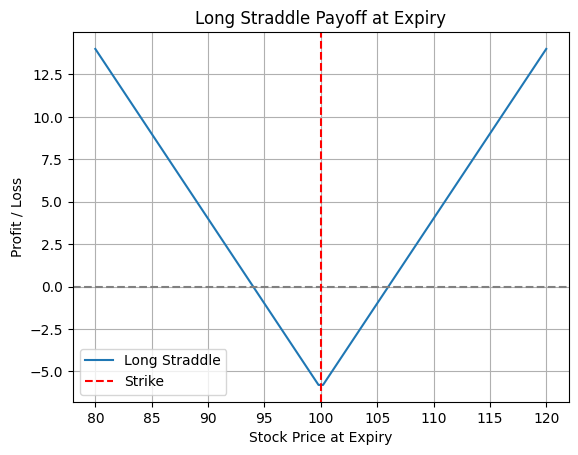

In [13]:
import numpy as np
import matplotlib.pyplot as plt

strike = 100
call_premium = 3
put_premium = 3
total_premium = call_premium + put_premium

prices = np.linspace(80, 120, 100)
call_payoff = np.maximum(prices - strike, 0) - call_premium
put_payoff = np.maximum(strike - prices, 0) - put_premium
straddle_payoff = call_payoff + put_payoff

plt.plot(prices, straddle_payoff, label="Long Straddle")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(strike, color='red', linestyle='--', label="Strike")
plt.title("Long Straddle Payoff at Expiry")
plt.xlabel("Stock Price at Expiry")
plt.ylabel("Profit / Loss")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import yfinance as yf

In [15]:
tqqq = yf.Ticker("TQQQ")
tqqq.options

('2025-04-17',
 '2025-04-25',
 '2025-05-02',
 '2025-05-09',
 '2025-05-16',
 '2025-05-23',
 '2025-06-20',
 '2025-09-19',
 '2026-01-16',
 '2027-01-15')

In [16]:
df = tqqq.option_chain( tqqq.options[1] ).calls
df

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TQQQ250425C00030000,2025-04-10 19:52:10+00:00,30.0,16.90,17.7,19.90,0.00,0.000000,79,379,1.535159,True,REGULAR,USD
1,TQQQ250425C00035000,2025-04-11 15:20:51+00:00,35.0,12.25,13.0,15.30,-2.47,-16.779892,32,80,1.408206,True,REGULAR,USD
2,TQQQ250425C00040000,2025-04-11 19:32:31+00:00,40.0,10.45,9.5,11.00,1.78,20.530561,221,654,1.444339,True,REGULAR,USD
3,TQQQ250425C00041000,2025-04-11 18:08:09+00:00,41.0,9.42,8.1,9.85,2.05,27.815470,18,206,1.228519,True,REGULAR,USD
4,TQQQ250425C00042000,2025-04-11 19:45:40+00:00,42.0,8.50,7.7,10.00,1.40,19.718311,170,753,1.434573,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,TQQQ250425C00085000,2025-04-03 14:06:07+00:00,85.0,0.15,0.0,0.50,0.00,0.000000,1,408,1.611330,False,REGULAR,USD
68,TQQQ250425C00090000,2025-04-11 16:53:16+00:00,90.0,0.28,0.0,0.24,0.25,833.333400,28,208,1.546877,False,REGULAR,USD
69,TQQQ250425C00095000,2025-04-01 19:48:18+00:00,95.0,0.84,0.0,0.50,0.00,0.000000,1,294,1.855469,False,REGULAR,USD
70,TQQQ250425C00100000,2025-04-09 18:03:07+00:00,100.0,0.07,0.0,1.47,0.00,0.000000,14,418,2.403324,False,REGULAR,USD


In [17]:
dict(df.dtypes)

{'contractSymbol': dtype('O'),
 'lastTradeDate': datetime64[ns, UTC],
 'strike': dtype('float64'),
 'lastPrice': dtype('float64'),
 'bid': dtype('float64'),
 'ask': dtype('float64'),
 'change': dtype('float64'),
 'percentChange': dtype('float64'),
 'volume': dtype('int64'),
 'openInterest': dtype('int64'),
 'impliedVolatility': dtype('float64'),
 'inTheMoney': dtype('bool'),
 'contractSize': dtype('O'),
 'currency': dtype('O')}

In [18]:
df_options = pl.DataFrame(schema={
    'contractSymbol': pl.String,
    'lastTradeDate': pl.Datetime("ns", "UTC"),
    'strike': pl.Float64,
    'lastPrice': pl.Float64,
    'bid': pl.Float64,
    'ask': pl.Float64,
    'change': pl.Float64,
    'percentChange': pl.Float64,
    'volume': pl.Int64,
    'openInterest': pl.Int64,
    'impliedVolatility': pl.Float64,
    'inTheMoney': pl.Boolean,
    'contractSize': pl.String,
    'currency': pl.String,
})

for exp in tqqq.options:
    for option_type in ["calls", "puts"]:
        df = getattr(tqqq.option_chain( exp ), option_type)
        df_options = df_options.vstack( pl.from_pandas(df).cast(df_options.schema) )

In [19]:
def get_days_to_expiry( contract_symbol ):
    pattern = r"([A-Z]+)(\d+)([C|P])(\d+)"
    matched = re.match( pattern, contract_symbol)
    if matched:
        expiry_date = datetime.strptime( matched.group(2), "%y%m%d").date()
        now_nyctz = datetime.now( pytz.timezone("America/New_York") )
        days_to_expiry = (expiry_date - now_nyctz.date()).days
        return days_to_expiry

df_options = df_options.with_columns(
    pl.col("lastTradeDate").dt.convert_time_zone("America/New_York")
).with_columns(
    pl.col("contractSymbol").map_elements( get_days_to_expiry, return_dtype=pl.Int64 ).alias("days_to_expiry")
)
df_options

contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,days_to_expiry
str,"datetime[ns, America/New_York]",f64,f64,f64,f64,f64,f64,i64,i64,f64,bool,str,str,i64
"""TQQQ250417C00030000""",2025-04-11 15:11:02 EDT,30.0,19.2,16.85,19.0,3.250001,20.376183,118,333,2.851565,true,"""REGULAR""","""USD""",4
"""TQQQ250417C00035000""",2025-04-11 14:59:57 EDT,35.0,14.15,12.1,14.4,1.6499996,13.199997,109,852,2.529301,true,"""REGULAR""","""USD""",4
"""TQQQ250417C00040000""",2025-04-11 15:57:07 EDT,40.0,9.7,9.0,9.55,1.6999998,21.249998,1153,2758,1.646486,true,"""REGULAR""","""USD""",4
"""TQQQ250417C00041000""",2025-04-11 15:58:19 EDT,41.0,8.7,7.8,9.7,1.0999999,14.473682,368,1083,1.835938,true,"""REGULAR""","""USD""",4
"""TQQQ250417C00042000""",2025-04-11 15:59:29 EDT,42.0,7.85,7.65,8.05,1.21,18.222893,1547,1637,1.734376,true,"""REGULAR""","""USD""",4
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TQQQ270115P00110000""",2025-04-04 12:31:42 EDT,110.0,68.0,60.05,64.5,0.0,0.0,341,326,0.535649,true,"""REGULAR""","""USD""",642
"""TQQQ270115P00115000""",2025-03-10 13:33:56 EDT,115.0,57.5,64.5,69.2,0.0,0.0,1,4,0.536382,true,"""REGULAR""","""USD""",642
"""TQQQ270115P00120000""",2025-03-24 09:30:01 EDT,120.0,57.5,69.5,74.0,0.0,0.0,10,59,0.540898,true,"""REGULAR""","""USD""",642


In [22]:
df_options.filter( pl.col("contractSymbol").is_in(["TQQQ250417C00045000", "TQQQ250417C00049000", "TQQQ250417C00053000"]))

contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,days_to_expiry
str,"datetime[ns, America/New_York]",f64,f64,f64,f64,f64,f64,i64,i64,f64,bool,str,str,i64
"""TQQQ250417C00045000""",2025-04-11 15:59:30 EDT,45.0,5.55,4.55,5.6,0.9000001,19.35484,4259,5316,1.350589,true,"""REGULAR""","""USD""",4
"""TQQQ250417C00049000""",2025-04-11 15:59:53 EDT,49.0,3.08,3.0,3.1,0.56,22.22222,14501,1796,1.430667,false,"""REGULAR""","""USD""",4
"""TQQQ250417C00053000""",2025-04-11 15:59:53 EDT,53.0,1.3,1.26,1.32,0.16,14.035085,4846,2706,1.264652,false,"""REGULAR""","""USD""",4


In [21]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata

# Polars extraction
x = df_options["strike"].to_numpy()
y = df_options["days_to_expiry"].to_numpy()
z = df_options["impliedVolatility"].to_numpy()

# Create grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
fig.update_layout(
    title='TQQQ Implied Volatility Surface',
    scene=dict(
        xaxis_title='Strike',
        yaxis_title='Days to Expiry',
        zaxis_title='Implied Volatility'
    ),
    width=1000,  # Wider
    height=700,  # Taller
    autosize=False,
    margin=dict(l=40, r=40, b=40, t=40),
)
fig.show()